In [24]:
#Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
pd.options.display.max_columns = 3000

In [5]:
cd ../..

/Users/paulettewarrick/DSI/projects/project_2


In [6]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

#Add Sale price and source to test data
test['SalePrice'] = 0

# Merge train and test
df = pd.concat([train, test])

# Update the headings of the final dataset
new_columns_dict = {c: c.replace(' ', '_').lower() for c in df.columns} #lowercase all column headings
df.rename(columns = new_columns_dict, inplace = True)

In [7]:
df

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,931.0,LwQ,153.0,0.0,1084.0,GasA,TA,Y,SBrkr,1084,793,0,1877,1.0,0.0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1974.0,Unf,2.0,488.0,TA,TA,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,0
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,Gd,Gd,CBlock,TA,TA,No,BLQ,575.0,Unf,0.0,529.0,1104.0,GasA,Ex,Y,SBrkr,1104,884,0,1988,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1966.0,RFn,2.0,480.0,TA,TA,Y,0,230,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD,0
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250.0,LwQ,492.0,210.0,952.0,GasA,Ex,Y,SBrkr,1211,0,0,1211,0.0,0.0,1,0,3,1,TA,5,Typ,1,TA,Attchd,1968.0,Unf,1.0,322.0,TA,TA,Y,0,63,0,0,0,0,NaN,NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2929 non-null   int64  
 1   pid              2929 non-null   int64  
 2   ms_subclass      2929 non-null   int64  
 3   ms_zoning        2929 non-null   object 
 4   lot_frontage     2439 non-null   float64
 5   lot_area         2929 non-null   int64  
 6   street           2929 non-null   object 
 7   alley            198 non-null    object 
 8   lot_shape        2929 non-null   object 
 9   land_contour     2929 non-null   object 
 10  utilities        2929 non-null   object 
 11  lot_config       2929 non-null   object 
 12  land_slope       2929 non-null   object 
 13  neighborhood     2929 non-null   object 
 14  condition_1      2929 non-null   object 
 15  condition_2      2929 non-null   object 
 16  bldg_type        2929 non-null   object 
 17  house_style    

In [9]:
def clean_data(df):
    df['lot_frontage'].fillna(0, inplace=True)
    df['alley'].fillna('NA', inplace=True)
    df['garage_area'].fillna(0, inplace=True)
    df['garage_cars'].fillna(0, inplace=True)
    df['total_bsmt_sf'].fillna(0, inplace=True)
    df['garage_yr_blt'].fillna(0, inplace=True)   
    df['mas_vnr_area'].fillna(0, inplace=True)
    df['bsmtfin_sf_1'].fillna(0, inplace=True)
    df['bsmtfin_sf_1'].fillna(0, inplace=True)
    df['electrical'].fillna('NA', inplace=True)
    df['bsmt_qual'].fillna('NA', inplace=True)
    df['fireplace_qu'].fillna('NA', inplace=True)
    df['mas_vnr_type'].fillna('NA', inplace=True)
    df['bsmt_cond'].fillna('NA', inplace=True)
    df['bsmt_exposure'].fillna('No', inplace=True)
    df['bsmtfin_type_1'].fillna('NA', inplace=True)
    df['bsmtfin_type_2'].fillna('NA', inplace=True)
    df['bsmtfin_sf_2'].fillna('NA', inplace=True)
    df['bsmt_unf_sf'].fillna(0, inplace=True)
    df['central_air'] = np.where(df['central_air'] == 'Y', 1, 0)
    df['bsmt_full_bath'].fillna(0, inplace=True)
    df['garage_finish'].fillna('NA', inplace=True)
    df['garage_cars'].fillna('NA', inplace=True)
    df['garage_qual'].fillna('NA', inplace=True)
    df['garage_cond'].fillna('NA', inplace=True)
    df['pool_qc'].fillna('NA', inplace=True)
    df['garage_type'].fillna(0, inplace=True)
    df['fence'].fillna('NA', inplace=True)
    df['misc_feature'].fillna('NA', inplace=True)
    return df


In [10]:
df = clean_data(df)

In [11]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [12]:
df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmt_unf_sf,total_bsmt_sf,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2929.000000,2.929000e+03,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2927.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000
mean,1465.255377,7.143984e+08,57.386480,57.623080,10137.697849,6.093547,5.563332,1971.344145,1984.258450,100.871287,441.857972,558.962786,1050.543189,0.933083,1158.882212,335.045408,4.678389,1498.606009,0.430864,0.061155,1.566064,0.379310,2.854216,1.044384,6.441448,0.599181,1870.740184,1.765790,472.517924,93.712871,47.411062,23.019461,2.593377,16.007511,2.244111,50.652441,6.214749,2007.790714,127072.160464
std,846.003265,1.887291e+08,42.645278,33.478461,7861.902406,1.409420,1.111678,30.243350,20.859235,178.246936,454.424155,439.576097,439.353506,0.249921,390.248168,427.891935,46.318337,502.174926,0.524746,0.245293,0.552400,0.502584,0.827868,0.214111,1.570977,0.647989,448.963667,0.760925,215.089601,126.365495,67.168919,64.148601,25.145578,56.096167,35.603235,566.440219,2.714055,1.316757,106362.524507
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,733.000000,5.284770e+08,20.000000,43.000000,7440.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,219.000000,793.000000,1.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,1465.000000,5.354532e+08,50.000000,63.000000,9434.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,465.000000,990.000000,1.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,134500.000000
75%,2198.000000,9.071811e+08,70.000000,78.000000,11553.000000,7.000000,6.000000,2001.000000,2004.000000,162.000000,734.000000,801.000000,1300.000000,1.000000,1384.000000,703.000000,0.000000,1742.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,186800.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,1.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


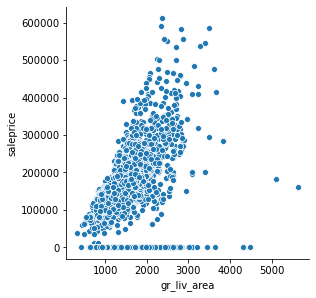

In [13]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=["gr_liv_area"], height=4);

In [14]:
# Check the outliers shown above
df[df["gr_liv_area"] > 4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0,466.0,6110.0,GasA,Ex,1,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0,1085.0,5095.0,GasA,Ex,1,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NA,NA,Elev,17000,10,2007,New,183850
170,1761,528320050,60,RL,160.0,15623,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0,300.0,2396.0,GasA,Ex,1,SBrkr,2411,2065,0,4476,1.0,0.0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3.0,813.0,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NA,0,7,2007,WD,0
463,1768,528351010,60,RL,104.0,21535,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0,989.0,2444.0,GasA,Ex,1,SBrkr,2444,1872,0,4316,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,0,NA,NA,NA,0,1,2007,WD,0


In [15]:
# Delete the first 2 row fron the train dataset

outliers = df[((df.gr_liv_area > 4000) &( df.saleprice > 0))].index
df.drop(outliers, inplace = True)

df[df["gr_liv_area"] > 4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
170,1761,528320050,60,RL,160.0,15623,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0,300.0,2396.0,GasA,Ex,1,SBrkr,2411,2065,0,4476,1.0,0.0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3.0,813.0,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NA,0,7,2007,WD,0
463,1768,528351010,60,RL,104.0,21535,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0,989.0,2444.0,GasA,Ex,1,SBrkr,2444,1872,0,4316,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,0,NA,NA,NA,0,1,2007,WD,0


In [16]:
#Separate Data back into train & test
train = df[df['saleprice'] > 0]
test = df[df['saleprice'] == 0]
test.drop(['saleprice'], axis=1, inplace=True)


/Users/paulettewarrick/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
train.shape

(2049, 81)

In [18]:
test.shape

(878, 80)

In [19]:
# Save data files to data folder
test.to_csv('./project_2_soln/data/test.csv', index = False)
train.to_csv('./project_2_soln/data/train.csv', index = False)


In [20]:
pwd

'/Users/paulettewarrick/DSI/projects/project_2'

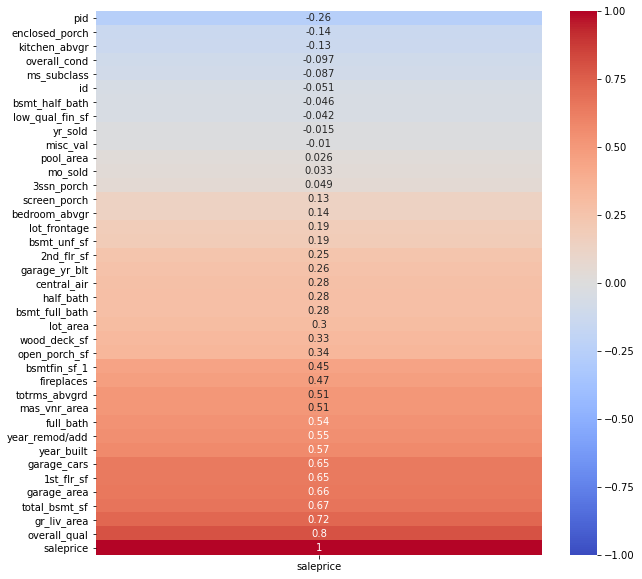

In [30]:
plt.figure(figsize=(10, 10))  # NOT WORKING WAS THROWING AN ERROR

sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice'),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='coolwarm');

In [28]:
cor = train.corr()

#Correlation with target variable
cor_target = abs(cor["saleprice"])

#selecting features with correlation strength of 0.2 or above
relevant_features = cor_target[cor_target>0.4]
relevant_features

overall_qual      0.803462
year_built        0.572405
year_remod/add    0.550872
mas_vnr_area      0.511273
bsmtfin_sf_1      0.446103
total_bsmt_sf     0.665116
1st_flr_sf        0.648252
gr_liv_area       0.719463
full_bath         0.538225
totrms_abvgrd     0.509775
fireplaces        0.473783
garage_cars       0.648227
garage_area       0.655097
saleprice         1.000000
Name: saleprice, dtype: float64

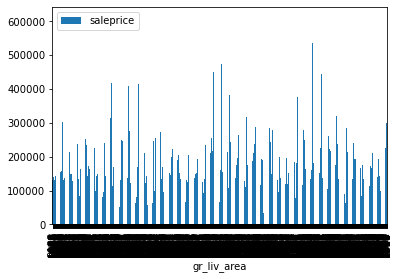

In [21]:
train.plot(x='gr_liv_area', y='saleprice', kind='bar'); 

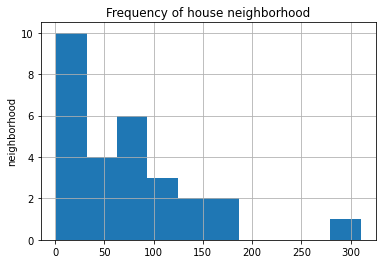

In [29]:
train['neighborhood'].value_counts().hist()

plt.title('Frequency of house neighborhood')
plt.ylabel('neighborhood'); 

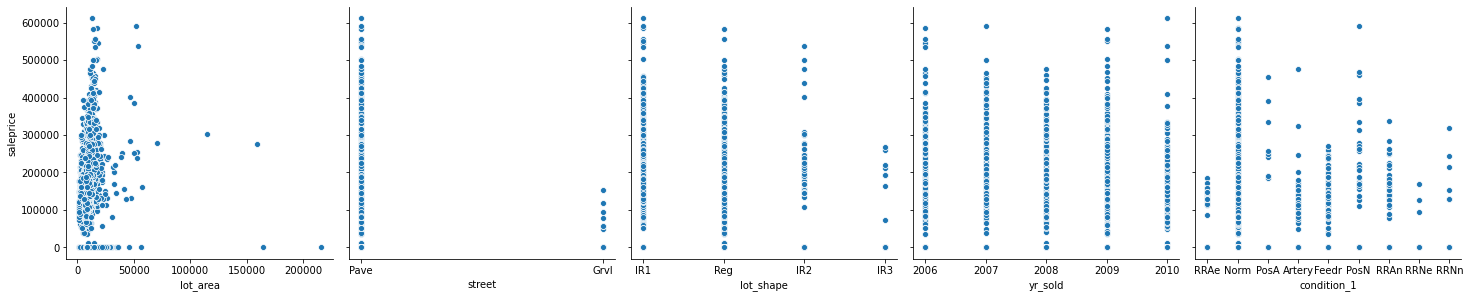

In [23]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=["lot_area", "street", "lot_shape", "yr_sold", "condition_1"], height=4);

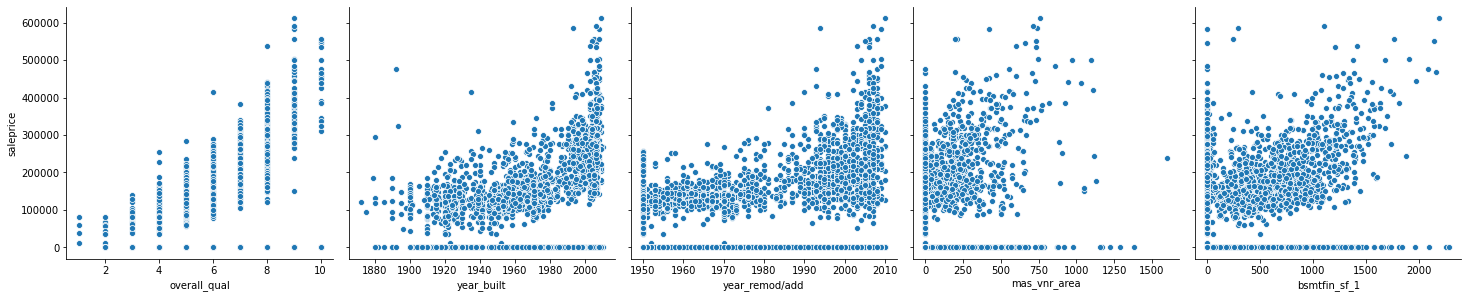

In [24]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=["overall_qual", "year_built", "year_remod/add", "mas_vnr_area", "bsmtfin_sf_1"], height=4);

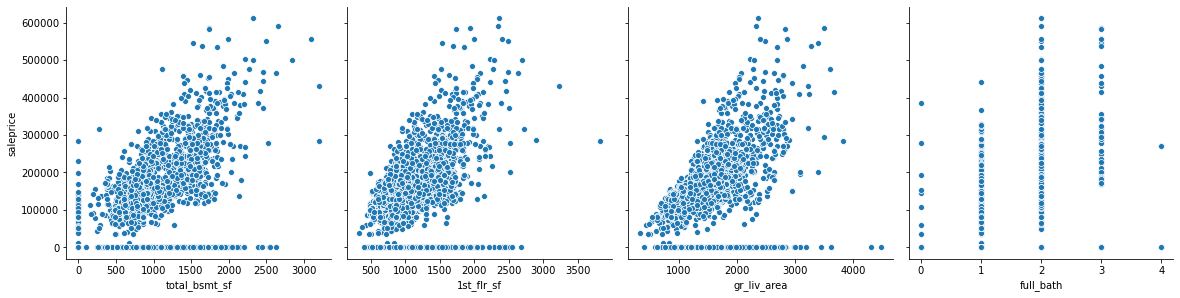

In [25]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=["total_bsmt_sf", "1st_flr_sf", "gr_liv_area", "full_bath"], height=4);

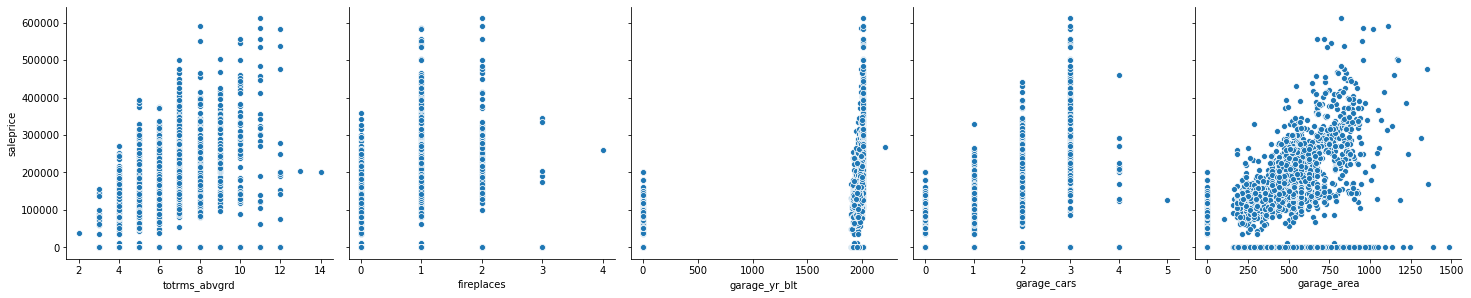

In [26]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=["totrms_abvgrd", "fireplaces", "garage_yr_blt", "garage_cars", "garage_area"], height=4);

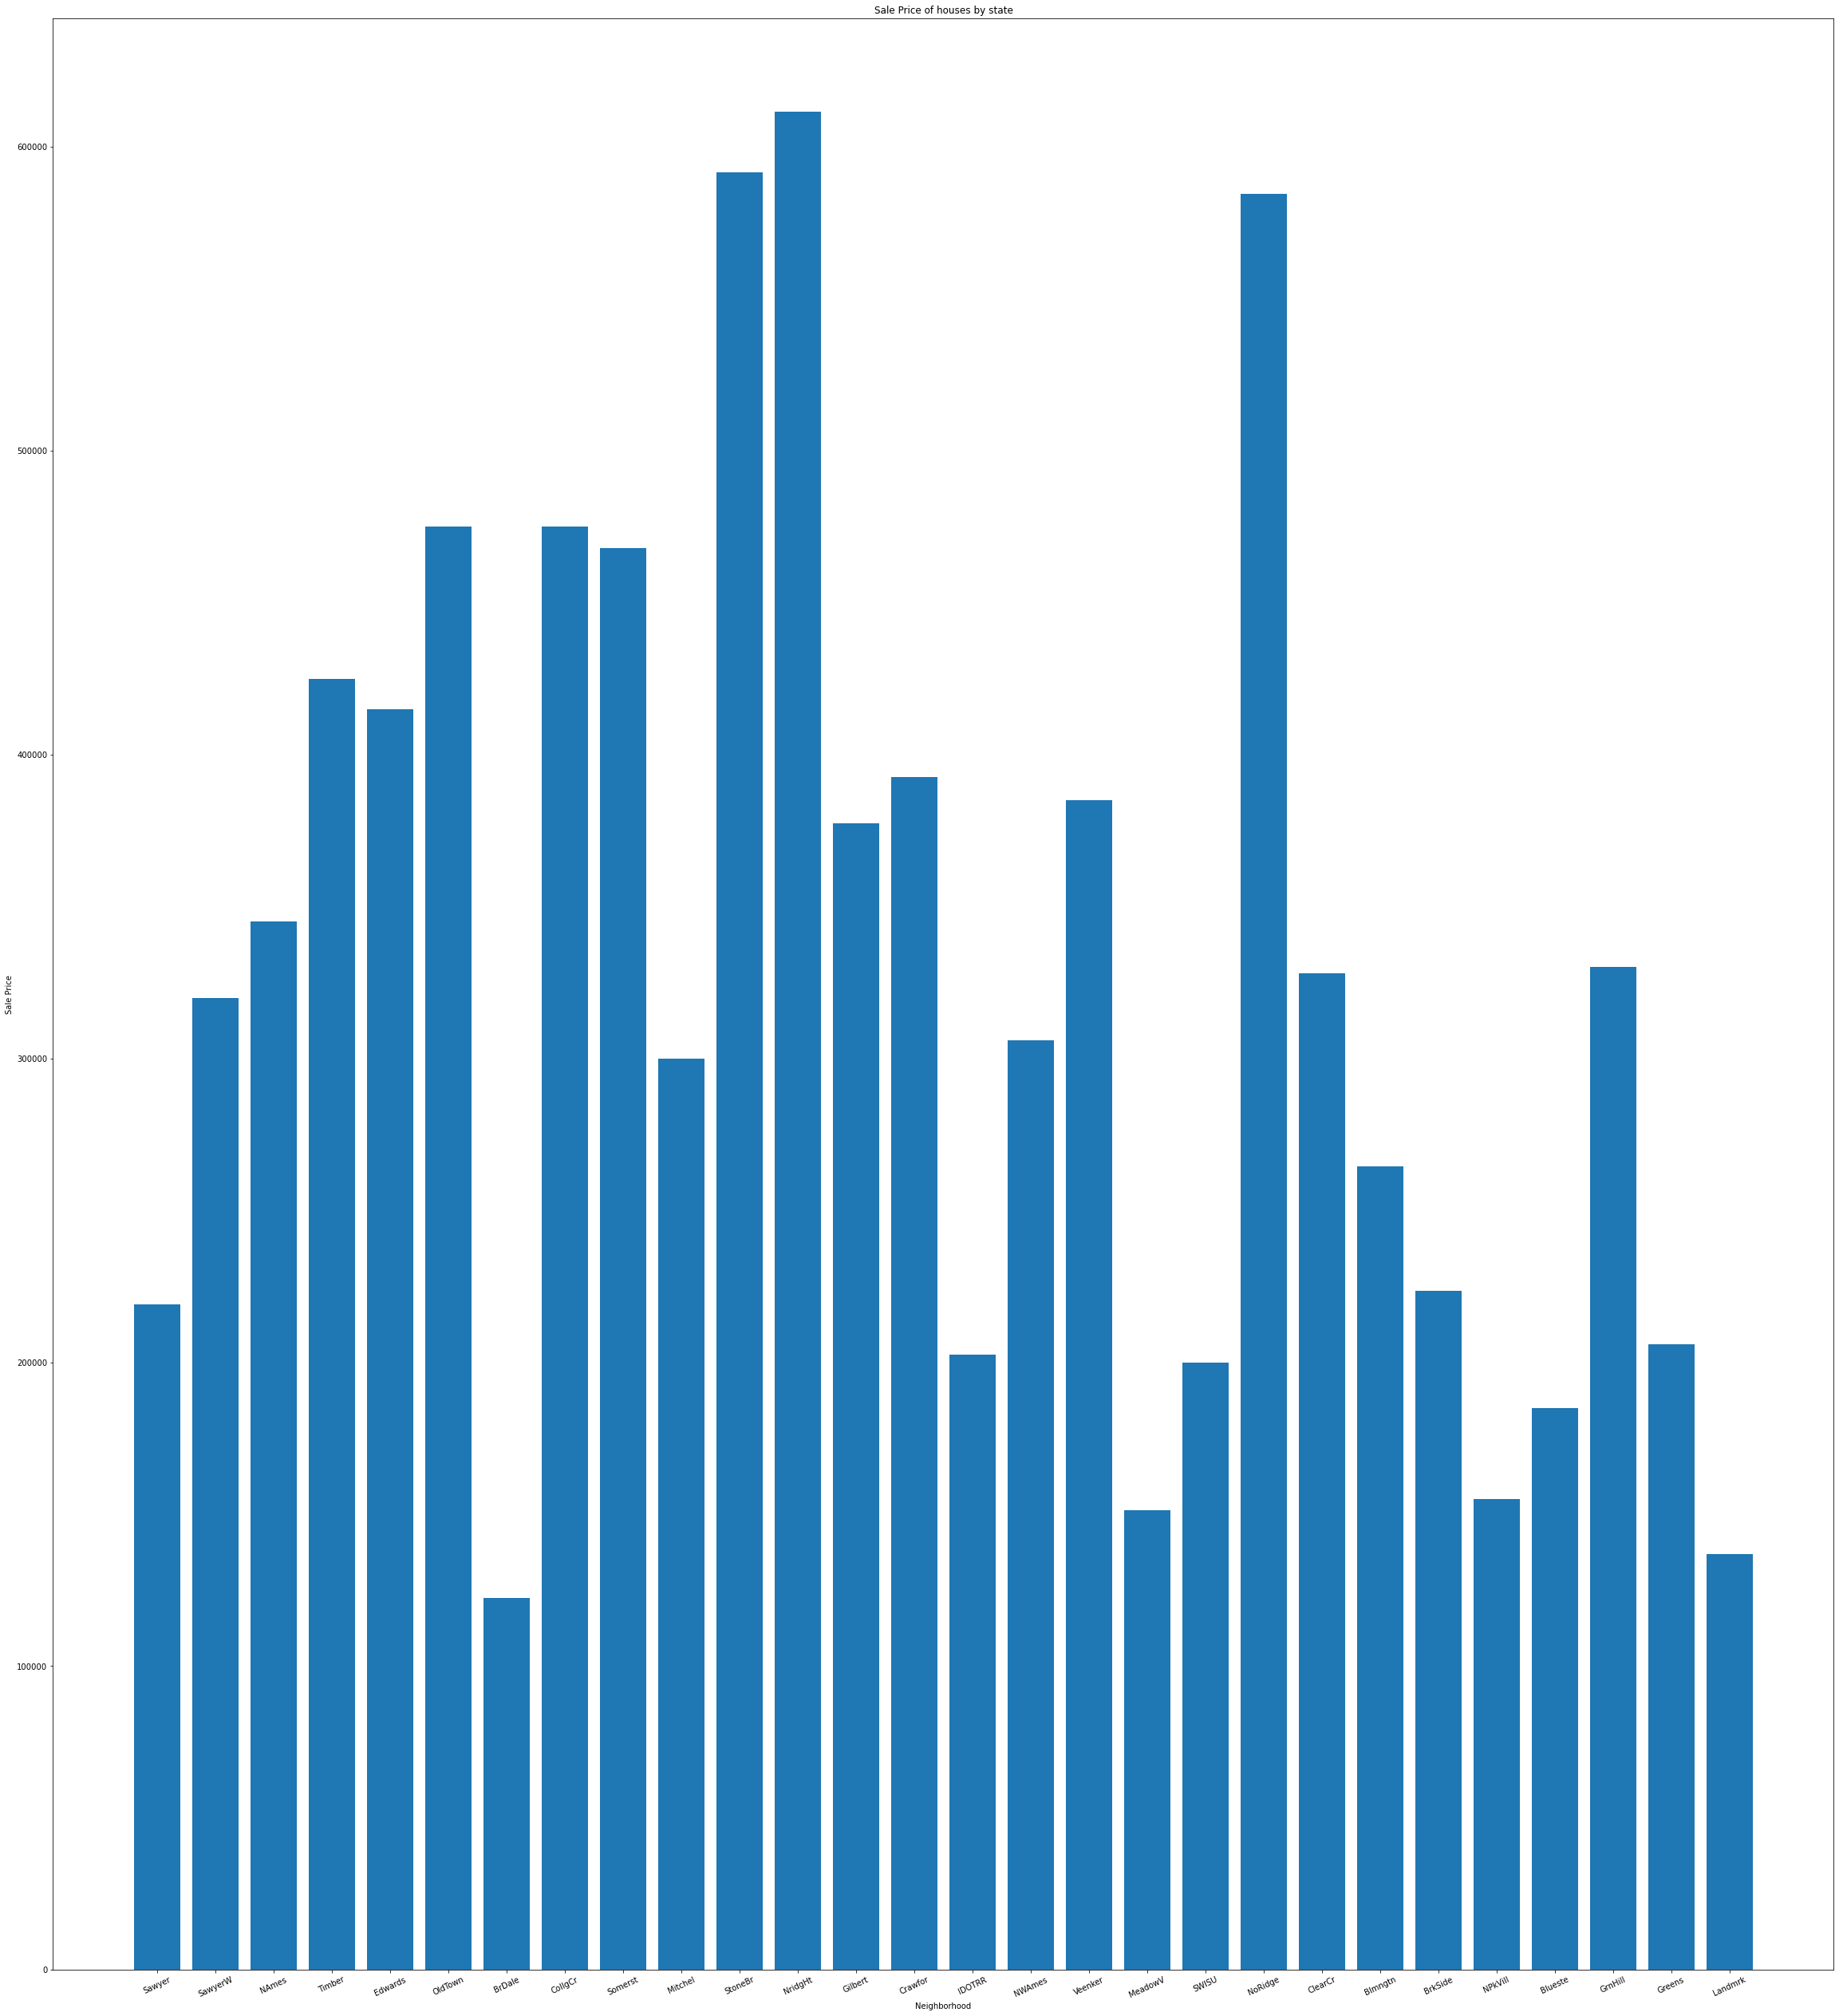

In [28]:

# Size
plt.figure(figsize = (40, 45))  #Not Working

# Bar chart
plt.bar(train['neighborhood'],
        train['saleprice'])

# Create a descriptive title
plt.title('Sale Price of houses by Neighborhood')
# Rotate text
plt.xticks(rotation = 25)
# Add axis labels
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price');